<a href="https://colab.research.google.com/github/smyegros3/Proyecto_Integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
import numpy as np
import random

# Define data
num_students = 100
names = [f"Nombre {i}" for i in range(num_students)]
last_names = [f"Apellido {i}" for i in range(num_students)]
dni_numbers = [random.randint(10000000, 50000000) for _ in range(num_students)]
subjects = ["Matemática", "Lengua", "Historia", "Geografía", "Inglés", "Biología", "Física", "Química"]


# Create DataFrame
df = pd.DataFrame({
    'Apellido': last_names,
    'Nombre': names,
    'nro_dni': dni_numbers,
    'materia escolar': [random.choice(subjects) for _ in range(num_students)],
    'nota 1er Trimestre': np.random.randint(1, 11, size=num_students),
    'nota 2do Trimestre': np.random.randint(1, 11, size=num_students),
    'nota 3er Trimestre': np.random.randint(1, 11, size=num_students),
    'Faltas a clases': np.random.randint(0, 30, size=num_students)
})

# Display the DataFrame
display(df)

,Apellido,Nombre,nro_dni,materia escolar,nota 1er Trimestre,nota 2do Trimestre,nota 3er Trimestre,Faltas a clases
0,Apellido 0,Nombre 0,12527393,Física,1,7,10,27
1,Apellido 1,Nombre 1,14780533,Física,3,9,2,17
2,Apellido 2,Nombre 2,26189117,Lengua,3,9,7,4
3,Apellido 3,Nombre 3,29152093,Biología,3,6,4,5
4,Apellido 4,Nombre 4,12282886,Geografía,2,8,9,3
...,...,...,...,...,...,...,...,...
95,Apellido 95,Nombre 95,36272700,Historia,9,7,6,12
96,Apellido 96,Nombre 96,11085873,Biología,2,5,1,14
97,Apellido 97,Nombre 97,42030382,Biología,8,5,6,16
98,Apellido 98,Nombre 98,25457371,Inglés,9,8,7,25


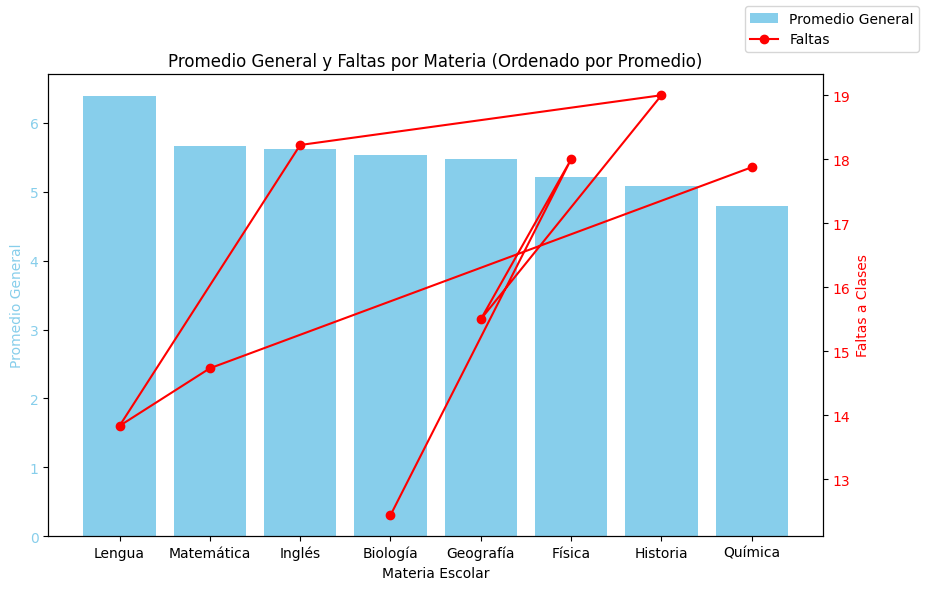

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average grade per subject
subject_avg_grades = df.groupby('materia escolar')[['nota 1er Trimestre', 'nota 2do Trimestre', 'nota 3er Trimestre']].mean().mean(axis=1)
subject_avg_grades = subject_avg_grades.sort_values(ascending=False)

# Calculate average absences per subject
subject_avg_absences = df.groupby('materia escolar')['Faltas a clases'].mean()

# Create bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Average grades (primary axis)
ax1.bar(subject_avg_grades.index, subject_avg_grades.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Absences (secondary axis)
ax2 = ax1.twinx()
ax2.plot(subject_avg_absences.index, subject_avg_absences.values, color='red', marker='o', label='Faltas')
ax2.set_ylabel('Faltas a Clases', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends and title
fig.legend(loc='upper right')
plt.title('Promedio General y Faltas por Materia (Ordenado por Promedio)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()